In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [3]:
game_filenames = [r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2009.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2010.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2011.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2012.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2013.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2014.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2015.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2016.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2017.csv']

game_headers = ['game_id', 'date', 'game_number', 'weekday', 'start_time', 'dh_used', 'day_night','visiting_team',
                'home_team', 'game_site', 'vis_starting_pitcher', 'home_starting_pitcher','home_plate_ump','base1_ump',
                'base2_ump', 'base3_ump','lf_ump', 'rf_ump', 'attendance','ps_scorer', 'translator', 'inputter',
                'input_time', 'edit_time', 'how_scored', 'pitches_entered', 'temperature', 'wind_dir', 'wind_speed',
                'field_cond','precipitation','sky', 'duration', 'total_innings', 'vis_final', 'home_final', 'vis_hits', 'home_hits',
                'vis_errors','home_errors','vis_lob', 'home_lob', 'winning_pitcher', 'losing_pitcher', 'save', 'gw_rbi', 
                'vis_batter1', 'vis_batter1_pos', 'vis_batter2', 'vis_batter2_pos', 'vis_batter3', 'vis_batter3_pos',
                'vis_batter4', 'vis_batter4_pos', 'vis_batter5', 'vis_batter5_pos', 'vis_batter6', 'vis_batter6_pos',
                'vis_batter7', 'vis_batter7_pos', 'vis_batter8', 'vis_batter8_pos', 'vis_batter9', 'vis_batter9_pos',
                'home_batter1', 'home_batter1_pos', 'home_batter2', 'home_batter2_pos', 'home_batter3', 'home_batter3_pos',
                'home_batter4', 'home_batter4_pos', 'home_batter5', 'home_batter5_pos', 'home_batter6', 'home_batter6_pos', 
                'home_batter7', 'home_batter7_pos', 'home_batter8', 'home_batter8_pos', 'home_batter9', 'home_batter9_pos',
                'vis_finishing_pitcher', 'home_finishing_pitcher']

In [4]:
game_data = []
for filename in game_filenames:
    if not game_data:
        all_games = pd.DataFrame(pd.read_csv(filename, low_memory=False, 
                        header=0, names=game_headers, index_col=False))
        game_data = [0]
    else:
        all_games_tmp = pd.DataFrame(pd.read_csv(filename, low_memory=False, 
                        header=0, names=game_headers, index_col=False))
        all_games = all_games.append(all_games_tmp)
        del(all_games_tmp)
del(game_data)

In [5]:
teams_match = {'ANA':'LAA', 'ARI':'ARI', 'ATL':'ATL', 'BAL':'BAL', 'BOS':'BOS', 'CHA':'CWS', 'CHN':'CHC', 'CIN':'CIN',
               'CLE':'CLE','COL':'COL', 'DET':'DET', 'FLO':'MIA', 'HOU':'HOU', 'KCA':'KC', 'LAN':'LAD','MIA':'MIA', 
               'MIL':'MIL','MIN':'MIN', 'NYA':'NYY', 'NYN':'NYM', 'OAK':'OAK', 'PHI':'PHI','PIT':'PIT', 'SDN':'SD', 
               'SEA':'SEA','SFN':'SF', 'SLN':'STL', 'TBA':'TB', 'TEX':'TEX', 'TOR':'TOR', 'WAS':'WSH'}

In [6]:
all_games['date'] = pd.to_datetime(all_games['game_id'].str[3:11], format='%Y-%m-%d')
all_games['odds_matchup'] = (all_games['date'].astype(str) + '-' + all_games['home_team'].map(teams_match)).astype(str) + '-' + (all_games['visiting_team'].map(teams_match)).astype(str)

all_games = all_games[['game_id', 'odds_matchup', 'date', 'weekday', 'start_time', 'duration', 'total_innings', 'day_night',
                       'game_site', 'attendance', 'home_final', 'vis_final','dh_used', 'home_team', 'visiting_team',
                       'home_plate_ump','base1_ump', 'base2_ump', 'base3_ump','lf_ump', 'rf_ump', 'temperature',
                       'wind_dir', 'wind_speed','field_cond','precipitation','sky',  'home_starting_pitcher', 
                       'vis_starting_pitcher', 'winning_pitcher', 'losing_pitcher', 'save', 'gw_rbi',  'home_hits',
                       'vis_hits','home_errors','vis_errors','home_lob', 'vis_lob',
                       'vis_batter1', 'vis_batter1_pos', 'vis_batter2', 'vis_batter2_pos', 'vis_batter3', 'vis_batter3_pos',
                       'vis_batter4', 'vis_batter4_pos', 'vis_batter5', 'vis_batter5_pos', 'vis_batter6', 'vis_batter6_pos',
                       'vis_batter7', 'vis_batter7_pos', 'vis_batter8', 'vis_batter8_pos', 'vis_batter9', 'vis_batter9_pos',
                       'home_batter1', 'home_batter1_pos', 'home_batter2', 'home_batter2_pos', 'home_batter3', 'home_batter3_pos',
                       'home_batter4', 'home_batter4_pos', 'home_batter5', 'home_batter5_pos', 'home_batter6', 'home_batter6_pos',
                       'home_batter7', 'home_batter7_pos', 'home_batter8', 'home_batter8_pos', 'home_batter9', 'home_batter9_pos',
                       'home_finishing_pitcher', 'vis_finishing_pitcher']]

In [7]:
odds_headers = ['year', 'day', 'month', 'game_time', 'country', 'league', 'season', 'home_team', 'away_team',
                'home_id', 'away_id','1st_inning_home_runs', '1st_inning_away_runs', '1st_inning_winner', 'over_0-5_runs',
                'over_1-5_runs', 'home_final_score','away_final score', 'winner', 'home_minus_1', 'home_plus_1',
                'away_minus_1', 'away_plus_1', 'ou_6', 'ou_7', 'ou_8', 'ou_9','p_ml_home_start', 'p_ml_away_start',
                'p_ml_home_final', 'p_ml_away_final', 'b_ml_home_start', 'b_ml_away_start','b_ml_home_final',
                'b_ml_away_final', 'p_ah_minus_1-5_home_start', 'p_ah_minus_1-5_away_start', 'p_ah_minus_1-5_home_final',
                'p_ah_minus_1-5_away_final', 'p_ah_plus_1-5_home_start', 'p_ah_plus_1-5_away_start', 'p_ah_plus_1-5_home_final',
                'p_ah_plus_1-5_away_final', 'b_ah_minus_1-5_home_start', 'b_ah_minus_1-5_away_start', 'b_ah_minus_1-5_home_final',
                'b_ah_minus_1-5_away_final', 'b_ah_plus_1-5_home_start', 'b_ah_plus_1-5_away_start', 'b_ah_plus_1-5_home_final', 
                'b_ah_plus_1-5_away_final', 'p_over_6-5_start', 'p_under_6-5_start', 'p_over_6-5_final', 'p_under_6-5_final', 
                'b_over_6-5_start', 'b_under_6-5_start', 'b_over_6-5_final', 'b_under_6-5_final', 'p_over_7-5_start', 
                'p_under_7-5_start','p_over_7-5_final', 'p_under_7-5_final', 'b_over_7-5_start', 'b_under_7-5_start', 
                'b_over_7-5_final', 'b_under_7-5_final', 'p_over_8-5_start', 'p_under_8-5_start', 'p_over_8-5_final', 
                'p_under_8-5_final', 'b_over_8-5_start', 'b_under_8-5_start', 'b_over_8-5_final', 'b_under_8-5_final']

In [8]:
odds = pd.read_csv(r'C:\\Users\\mendo\\Desktop\\MLB Odds-US.csv', sep=';', header=0, low_memory=False, 
                   names=odds_headers, index_col=False)
odds = pd.DataFrame(odds)
odds['date'] = odds.year.astype(str) +'-' + odds.day.astype(str) + '-' + odds.month
odds['date'] = pd.to_datetime(odds['date'], format='%Y-%d-%b')
odds['odds_matchup'] = odds.date.astype(str) + '-' + odds.home_id +  '-' + odds.away_id
odds = odds[['odds_matchup', 'date', 'season', 'month', 'day', 'game_time', 'home_id', 'home_team', 'away_id', 'away_team',
             '1st_inning_home_runs', '1st_inning_away_runs', '1st_inning_winner', 'over_0-5_runs','over_1-5_runs', 
             'home_final_score','away_final score', 'winner', 'home_minus_1', 'home_plus_1','away_minus_1', 'away_plus_1',
             'ou_6', 'ou_7', 'ou_8', 'ou_9','p_ml_home_start', 'p_ml_away_start','p_ml_home_final', 'p_ml_away_final',
             'b_ml_home_start', 'b_ml_away_start','b_ml_home_final','b_ml_away_final', 'p_ah_minus_1-5_home_start', 
             'p_ah_minus_1-5_away_start', 'p_ah_minus_1-5_home_final','p_ah_minus_1-5_away_final', 'p_ah_plus_1-5_home_start',
             'p_ah_plus_1-5_away_start', 'p_ah_plus_1-5_home_final', 'p_ah_plus_1-5_away_final', 'b_ah_minus_1-5_home_start',
             'b_ah_minus_1-5_away_start', 'b_ah_minus_1-5_home_final','b_ah_minus_1-5_away_final', 'b_ah_plus_1-5_home_start',
             'b_ah_plus_1-5_away_start', 'b_ah_plus_1-5_home_final', 'b_ah_plus_1-5_away_final', 'p_over_6-5_start',
             'p_under_6-5_start', 'p_over_6-5_final', 'p_under_6-5_final', 'b_over_6-5_start', 'b_under_6-5_start', 
             'b_over_6-5_final', 'b_under_6-5_final', 'p_over_7-5_start','p_under_7-5_start','p_over_7-5_final',
             'p_under_7-5_final', 'b_over_7-5_start', 'b_under_7-5_start', 'b_over_7-5_final', 'b_under_7-5_final',
             'p_over_8-5_start', 'p_under_8-5_start', 'p_over_8-5_final','p_under_8-5_final', 'b_over_8-5_start', 
             'b_under_8-5_start', 'b_over_8-5_final', 'b_under_8-5_final']]

In [9]:
# about 2,300 games without odds data
# 20,000 games with both

game_odds = all_games.merge(odds, how='inner', on='odds_matchup')

In [10]:
game_odds = game_odds[['game_id', 'odds_matchup', 'date_x', 'weekday','season', 'month', 'start_time',
       'duration', 'total_innings', 'day_night', 'game_site', 'attendance',
       'home_final', 'vis_final', 'dh_used', 'home_team_x',
       'visiting_team', 'home_plate_ump', 'base1_ump', 'base2_ump',
       'base3_ump', 'temperature', 'wind_dir',
       'wind_speed', 'field_cond', 'precipitation', 'sky',
       'home_starting_pitcher', 'vis_starting_pitcher', 'winning_pitcher',
       'losing_pitcher', 'save', 'home_hits', 'vis_hits',
       'home_errors', 'vis_errors', 'home_lob', 'vis_lob', 'winner', 'home_minus_1', 'home_plus_1',
       'away_minus_1', 'away_plus_1', 'ou_6', 'ou_7', 'ou_8', 'ou_9', 'p_ml_home_start', 'p_ml_away_start', 'p_ml_home_final',
       'p_ml_away_final']]

In [11]:
# can eventually adjust wager amount to be a product of confidence level based on predictive analysis

game_odds['wager'] = 10

In [12]:
win_team = []
for index, row in game_odds.iterrows():
    if row['winner']=='H':
        win = row['home_team_x']
    elif row['winner']=='A':
        win = row['visiting_team']
    else: 
        win = 0
    win_team.append(win)

game_odds['winning_team'] = win_team

In [13]:
# calculating potential winnings
def payout(odds_column):
    payout_cash = []
    for odds in odds_column:
        if odds < 0:
            pay = round(((100/abs(odds))*game_odds['wager']), 2)
        else: 
            pay = round(((odds/100)*game_odds['wager']), 2)
        payout_cash.append(pay[1])
    return payout_cash

game_odds['ml_h_win'] = payout(game_odds['p_ml_home_final'])
game_odds['ml_a_win'] = payout(game_odds['p_ml_away_final'])

In [14]:
# calculating actual results in dollars

# HOME & VIS RESULTS

h_ml_results = []
v_ml_results = []

for index, row in game_odds.iterrows():
    if row['winner'] == 'H':
        h_pay = row['ml_h_win']
        v_pay = row['wager']*-1
    elif row['winner'] == 'A':
        h_pay = row['wager']*-1
        v_pay = row['ml_a_win']
    else:
        h_pay = 0
        v_pay = 0
    h_ml_results.append(h_pay)
    v_ml_results.append(v_pay)
    
game_odds['h_ml_result'] = h_ml_results
game_odds['a_ml_result'] = v_ml_results
game_odds[np.isfinite(game_odds['h_ml_result'])]

game_odds.to_csv(r'C:\\Users\\mendo\\Desktop\\game_odds.csv', sep=',')


In [15]:
game_odds

,game_id,odds_matchup,date_x,weekday,season,month,start_time,duration,total_innings,day_night,game_site,attendance,home_final,vis_final,dh_used,home_team_x,visiting_team,home_plate_ump,base1_ump,base2_ump,base3_ump,temperature,wind_dir,wind_speed,field_cond,precipitation,sky,home_starting_pitcher,vis_starting_pitcher,winning_pitcher,losing_pitcher,save,home_hits,vis_hits,home_errors,vis_errors,home_lob,vis_lob,winner,home_minus_1,home_plus_1,away_minus_1,away_plus_1,ou_6,ou_7,ou_8,ou_9,p_ml_home_start,p_ml_away_start,p_ml_home_final,p_ml_away_final,wager,winning_team,ml_h_win,ml_a_win,h_ml_result,a_ml_result
0,ANA200904070,2009-04-07-LAA-OAK,2009-04-07,Tuesday,2009,Apr,707,197,9,N,ANA01,43396,4,6,T,ANA,OAK,vanol901,holbs901,iassd901,relic901,62,2,10,0,0,0,mosed001,cahit001,wuerm001,jepsk001,ziegb001,8,16,0,1,10,12,H,W,W,L,L,U,U,U,U,-147.0,139.0,-137.0,134.0,10,ANA,7.30,13.40,7.30,-10.00
1,ANA200904080,2009-04-08-LAA-OAK,2009-04-08,Wednesday,2009,Apr,707,193,9,N,ANA01,43283,4,6,T,ANA,OAK,holbs901,iassd901,relic901,vanol901,60,2,12,0,0,2,adenn001,eveld001,baila001,fuenb001,ziegb001,9,15,0,2,8,13,A,L,L,W,W,O,O,O,O,-103.0,100.0,-109.0,-103.0,10,OAK,9.17,9.71,-10.00,9.71
2,ANA200904110,2009-04-11-LAA-BOS,2009-04-11,Saturday,2009,Apr,111,174,9,D,ANA01,40163,4,5,T,ANA,BOS,rapue901,schrp901,hudsm901,westj901,63,2,8,0,0,0,saunj001,pennb002,pennb002,saunj001,papej001,8,8,0,0,7,3,A,L,W,L,W,O,O,O,U,-115.0,106.0,-109.0,102.0,10,BOS,9.17,10.20,-10.00,10.20
3,ANA200904110,2009-04-11-LAA-BOS,2009-04-11,Saturday,2009,Apr,111,174,9,D,ANA01,40163,4,5,T,ANA,BOS,rapue901,schrp901,hudsm901,westj901,63,2,8,0,0,0,saunj001,pennb002,pennb002,saunj001,papej001,8,8,0,0,7,3,H,W,W,L,L,O,O,O,U,-101.0,-108.0,-105.0,-103.0,10,ANA,9.52,9.71,9.52,-10.00
4,ANA200904120,2009-04-12-LAA-BOS,2009-04-12,Sunday,2009,Apr,1239,196,9,D,ANA01,38076,5,4,T,ANA,BOS,schrp901,hudsm901,westj901,rapue901,66,3,3,0,0,1,mosed001,beckj002,mosed001,beckj002,fuenb001,10,9,2,0,5,10,H,L,W,L,W,O,O,O,U,158.0,-161.0,163.0,-172.0,10,ANA,16.30,5.81,16.30,-10.00
5,ANA200904220,2009-04-22-LAA-DET,2009-04-22,Wednesday,2009,Apr,707,206,9,N,ANA01,43047,10,12,T,ANA,DET,wegnm901,drakr901,kellj901,timmt901,61,2,7,0,0,2,saunj001,verlj001,rincj001,shies002,NaN,16,18,1,0,8,8,H,L,W,L,W,O,U,U,U,100.0,100.0,-108.0,-104.0,10,ANA,9.26,9.62,9.26,-10.00
6,ANA200904230,2009-04-23-LAA-DET,2009-04-23,Thursday,2009,Apr,707,180,9,N,ANA01,38543,10,5,T,ANA,DET,drakr901,kellj901,timmt901,wegnm901,64,0,8,0,0,2,palmm001,jacke001,palmm001,jacke001,NaN,15,7,1,3,9,5,A,L,L,W,W,O,O,O,O,-108.0,-101.0,-103.0,-105.0,10,DET,9.71,9.52,-10.00,9.52
7,ANA200904250,2009-04-25-LAA-SEA,2009-04-25,Saturday,2009,Apr,608,184,9,N,ANA01,43542,8,9,T,ANA,SEA,mcclt901,barrt901,gibsg901,fleta901,66,2,4,0,0,1,ortea001,silvc001,silvc001,ortea001,aardd001,11,12,1,0,7,5,A,L,L,W,W,O,O,O,O,112.0,-110.0,108.0,-116.0,10,SEA,10.80,8.62,-10.00,8.62
8,ANA200904260,2009-04-26-LAA-SEA,2009-04-26,Sunday,2009,Apr,1237,163,9,D,ANA01,43057,8,0,T,ANA,SEA,barrt901,gibsg901,fleta901,mcclt901,66,2,8,0,0,1,weavj003,washj001,weavj003,washj001,NaN,14,5,0,1,10,7,H,W,W,L,L,O,O,U,U,-139.0,133.0,-147.0,137.0,10,ANA,6.80,13.70,6.80,-10.00
9,ANA200904260,2009-04-26-LAA-SEA,2009-04-26,Sunday,2009,Apr,1237,163,9,D,ANA01,43057,8,0,T,ANA,SEA,barrt901,gibsg901,fleta901,mcclt901,66,2,8,0,0,1,weavj003,washj001,weavj003,washj001,NaN,14,5,0,1,10,7,A,L,W,L,W,O,O,O,O,-120.0,120.0,-128.0,115.0,10,SEA,7.81,11.50,-10.00,11.50


In [16]:
game_odds['temperature'].describe()

count    20782.000000
mean        73.412039
std         10.615273
min         23.000000
25%         67.000000
50%         73.000000
75%         81.000000
max        106.000000
Name: temperature, dtype: float64

In [17]:
# optimal result

optimal = []
for index, row in game_odds.iterrows():
    if row['winner']=='H':
        opt = row['h_ml_result']
    elif row['winner']=='A':
        opt = row['a_ml_result']
    else: 
        opt = 0
    optimal.append(opt)

game_odds['optimal'] = optimal
game_odds['optimal'].sum()

199193.10999999152

In [18]:
# identifying favorites
# can later use to identify pick based on strategy-n

favorite = []
for index, row in game_odds.iterrows():
    if row['p_ml_home_final'] < row['p_ml_away_final']:
        fav = 'H'
    elif row['p_ml_home_final'] > row['p_ml_away_final']:
        fav = 'A'
    else:
        fav = 'P'
    favorite.append(fav)
game_odds['favorite'] = favorite

In [19]:
def outcome(df, strategy_winner, winner, home_result, away_result, wager):
    fav_strategy = []
    for index, row in df.iterrows():
        if (row[strategy_winner] == 'H') & (row[winner]=='H'):
            fav = row[home_result]
        elif (row[strategy_winner] == 'A') & (row[winner]=='A'):
            fav = row[away_result]
        else: 
            fav = row[wager]*-1
        fav_strategy.append(fav)
    return(fav_strategy)

In [20]:
def outcome(strategy_winner):
    fav_strategy = []
    for index, row in game_odds.iterrows():
        if (row[strategy_winner] == 'H') & (row['winner']=='H'):
            fav = row['h_ml_result']
        elif (row[strategy_winner] == 'A') & (row['winner']=='A'):
            fav = row['a_ml_result']
        else: 
            fav = row['wager']*-1
        fav_strategy.append(fav)
    return(fav_strategy)

In [21]:
game_odds['test'] = outcome('favorite')
game_odds

,game_id,odds_matchup,date_x,weekday,season,month,start_time,duration,total_innings,day_night,game_site,attendance,home_final,vis_final,dh_used,home_team_x,visiting_team,home_plate_ump,base1_ump,base2_ump,base3_ump,temperature,wind_dir,wind_speed,field_cond,precipitation,sky,home_starting_pitcher,vis_starting_pitcher,winning_pitcher,losing_pitcher,save,home_hits,vis_hits,home_errors,vis_errors,home_lob,vis_lob,winner,home_minus_1,home_plus_1,away_minus_1,away_plus_1,ou_6,ou_7,ou_8,ou_9,p_ml_home_start,p_ml_away_start,p_ml_home_final,p_ml_away_final,wager,winning_team,ml_h_win,ml_a_win,h_ml_result,a_ml_result,optimal,favorite,test
0,ANA200904070,2009-04-07-LAA-OAK,2009-04-07,Tuesday,2009,Apr,707,197,9,N,ANA01,43396,4,6,T,ANA,OAK,vanol901,holbs901,iassd901,relic901,62,2,10,0,0,0,mosed001,cahit001,wuerm001,jepsk001,ziegb001,8,16,0,1,10,12,H,W,W,L,L,U,U,U,U,-147.0,139.0,-137.0,134.0,10,ANA,7.30,13.40,7.30,-10.00,7.30,H,7.30
1,ANA200904080,2009-04-08-LAA-OAK,2009-04-08,Wednesday,2009,Apr,707,193,9,N,ANA01,43283,4,6,T,ANA,OAK,holbs901,iassd901,relic901,vanol901,60,2,12,0,0,2,adenn001,eveld001,baila001,fuenb001,ziegb001,9,15,0,2,8,13,A,L,L,W,W,O,O,O,O,-103.0,100.0,-109.0,-103.0,10,OAK,9.17,9.71,-10.00,9.71,9.71,H,-10.00
2,ANA200904110,2009-04-11-LAA-BOS,2009-04-11,Saturday,2009,Apr,111,174,9,D,ANA01,40163,4,5,T,ANA,BOS,rapue901,schrp901,hudsm901,westj901,63,2,8,0,0,0,saunj001,pennb002,pennb002,saunj001,papej001,8,8,0,0,7,3,A,L,W,L,W,O,O,O,U,-115.0,106.0,-109.0,102.0,10,BOS,9.17,10.20,-10.00,10.20,10.20,H,-10.00
3,ANA200904110,2009-04-11-LAA-BOS,2009-04-11,Saturday,2009,Apr,111,174,9,D,ANA01,40163,4,5,T,ANA,BOS,rapue901,schrp901,hudsm901,westj901,63,2,8,0,0,0,saunj001,pennb002,pennb002,saunj001,papej001,8,8,0,0,7,3,H,W,W,L,L,O,O,O,U,-101.0,-108.0,-105.0,-103.0,10,ANA,9.52,9.71,9.52,-10.00,9.52,H,9.52
4,ANA200904120,2009-04-12-LAA-BOS,2009-04-12,Sunday,2009,Apr,1239,196,9,D,ANA01,38076,5,4,T,ANA,BOS,schrp901,hudsm901,westj901,rapue901,66,3,3,0,0,1,mosed001,beckj002,mosed001,beckj002,fuenb001,10,9,2,0,5,10,H,L,W,L,W,O,O,O,U,158.0,-161.0,163.0,-172.0,10,ANA,16.30,5.81,16.30,-10.00,16.30,A,-10.00
5,ANA200904220,2009-04-22-LAA-DET,2009-04-22,Wednesday,2009,Apr,707,206,9,N,ANA01,43047,10,12,T,ANA,DET,wegnm901,drakr901,kellj901,timmt901,61,2,7,0,0,2,saunj001,verlj001,rincj001,shies002,NaN,16,18,1,0,8,8,H,L,W,L,W,O,U,U,U,100.0,100.0,-108.0,-104.0,10,ANA,9.26,9.62,9.26,-10.00,9.26,H,9.26
6,ANA200904230,2009-04-23-LAA-DET,2009-04-23,Thursday,2009,Apr,707,180,9,N,ANA01,38543,10,5,T,ANA,DET,drakr901,kellj901,timmt901,wegnm901,64,0,8,0,0,2,palmm001,jacke001,palmm001,jacke001,NaN,15,7,1,3,9,5,A,L,L,W,W,O,O,O,O,-108.0,-101.0,-103.0,-105.0,10,DET,9.71,9.52,-10.00,9.52,9.52,A,9.52
7,ANA200904250,2009-04-25-LAA-SEA,2009-04-25,Saturday,2009,Apr,608,184,9,N,ANA01,43542,8,9,T,ANA,SEA,mcclt901,barrt901,gibsg901,fleta901,66,2,4,0,0,1,ortea001,silvc001,silvc001,ortea001,aardd001,11,12,1,0,7,5,A,L,L,W,W,O,O,O,O,112.0,-110.0,108.0,-116.0,10,SEA,10.80,8.62,-10.00,8.62,8.62,A,8.62
8,ANA200904260,2009-04-26-LAA-SEA,2009-04-26,Sunday,2009,Apr,1237,163,9,D,ANA01,43057,8,0,T,ANA,SEA,barrt901,gibsg901,fleta901,mcclt901,66,2,8,0,0,1,weavj003,washj001,weavj003,washj001,NaN,14,5,0,1,10,7,H,W,W,L,L,O,O,U,U,-139.0,133.0,-147.0,137.0,10,ANA,6.80,13.70,6.80,-10.00,6.80,H,6.80
9,ANA200904260,2009-04-26-LAA-SEA,2009-04-26,Sunday,2009,Apr,1237,163,9,D,ANA01,43057,8,0,T,ANA,SEA,barrt901,gibsg901,fleta901,mcclt901,66,2,8,0,0,1,weavj003,washj001,weavj003,washj001,NaN,14,5,0,1,10,7,A,L,W,L,W,O,O,O,O,-120.0,120.0,-128.0,115.0,10,SEA,7.81,11.50,-10.00,11.50,11.50,H,-10.00


In [22]:
# favorite strategy

fav_strategy = []
for index, row in game_odds.iterrows():
    if (row['favorite'] == 'H') & (row['winner']=='H'):
        fav = row['h_ml_result']
    elif (row['favorite'] == 'A') & (row['winner']=='A'):
        fav = row['a_ml_result']
    else: 
        fav = row['wager']*-1
    fav_strategy.append(fav)
    
game_odds['fav_strategy_outcome'] = fav_strategy
game_odds['fav_strategy_outcome'].sum()

-6625.669999999974

In [23]:
# underdog strategy

dog_strategy = []
for index, row in game_odds.iterrows():
    if (row['favorite'] == 'H') & (row['winner']!='H'):
        dog = row['a_ml_result']
    elif (row['favorite'] == 'A') & (row['winner']!='A'):
        dog = row['h_ml_result']
    else: 
        dog = row['wager']*-1
    dog_strategy.append(dog)
    
game_odds['dog_strategy_outcome'] = dog_strategy
game_odds['dog_strategy_outcome'].sum()

-6857.519999999947

In [24]:
game_odds

,game_id,odds_matchup,date_x,weekday,season,month,start_time,duration,total_innings,day_night,game_site,attendance,home_final,vis_final,dh_used,home_team_x,visiting_team,home_plate_ump,base1_ump,base2_ump,base3_ump,temperature,wind_dir,wind_speed,field_cond,precipitation,sky,home_starting_pitcher,vis_starting_pitcher,winning_pitcher,losing_pitcher,save,home_hits,vis_hits,home_errors,vis_errors,home_lob,vis_lob,winner,home_minus_1,home_plus_1,away_minus_1,away_plus_1,ou_6,ou_7,ou_8,ou_9,p_ml_home_start,p_ml_away_start,p_ml_home_final,p_ml_away_final,wager,winning_team,ml_h_win,ml_a_win,h_ml_result,a_ml_result,optimal,favorite,test,fav_strategy_outcome,dog_strategy_outcome
0,ANA200904070,2009-04-07-LAA-OAK,2009-04-07,Tuesday,2009,Apr,707,197,9,N,ANA01,43396,4,6,T,ANA,OAK,vanol901,holbs901,iassd901,relic901,62,2,10,0,0,0,mosed001,cahit001,wuerm001,jepsk001,ziegb001,8,16,0,1,10,12,H,W,W,L,L,U,U,U,U,-147.0,139.0,-137.0,134.0,10,ANA,7.30,13.40,7.30,-10.00,7.30,H,7.30,7.30,-10.00
1,ANA200904080,2009-04-08-LAA-OAK,2009-04-08,Wednesday,2009,Apr,707,193,9,N,ANA01,43283,4,6,T,ANA,OAK,holbs901,iassd901,relic901,vanol901,60,2,12,0,0,2,adenn001,eveld001,baila001,fuenb001,ziegb001,9,15,0,2,8,13,A,L,L,W,W,O,O,O,O,-103.0,100.0,-109.0,-103.0,10,OAK,9.17,9.71,-10.00,9.71,9.71,H,-10.00,-10.00,9.71
2,ANA200904110,2009-04-11-LAA-BOS,2009-04-11,Saturday,2009,Apr,111,174,9,D,ANA01,40163,4,5,T,ANA,BOS,rapue901,schrp901,hudsm901,westj901,63,2,8,0,0,0,saunj001,pennb002,pennb002,saunj001,papej001,8,8,0,0,7,3,A,L,W,L,W,O,O,O,U,-115.0,106.0,-109.0,102.0,10,BOS,9.17,10.20,-10.00,10.20,10.20,H,-10.00,-10.00,10.20
3,ANA200904110,2009-04-11-LAA-BOS,2009-04-11,Saturday,2009,Apr,111,174,9,D,ANA01,40163,4,5,T,ANA,BOS,rapue901,schrp901,hudsm901,westj901,63,2,8,0,0,0,saunj001,pennb002,pennb002,saunj001,papej001,8,8,0,0,7,3,H,W,W,L,L,O,O,O,U,-101.0,-108.0,-105.0,-103.0,10,ANA,9.52,9.71,9.52,-10.00,9.52,H,9.52,9.52,-10.00
4,ANA200904120,2009-04-12-LAA-BOS,2009-04-12,Sunday,2009,Apr,1239,196,9,D,ANA01,38076,5,4,T,ANA,BOS,schrp901,hudsm901,westj901,rapue901,66,3,3,0,0,1,mosed001,beckj002,mosed001,beckj002,fuenb001,10,9,2,0,5,10,H,L,W,L,W,O,O,O,U,158.0,-161.0,163.0,-172.0,10,ANA,16.30,5.81,16.30,-10.00,16.30,A,-10.00,-10.00,16.30
5,ANA200904220,2009-04-22-LAA-DET,2009-04-22,Wednesday,2009,Apr,707,206,9,N,ANA01,43047,10,12,T,ANA,DET,wegnm901,drakr901,kellj901,timmt901,61,2,7,0,0,2,saunj001,verlj001,rincj001,shies002,NaN,16,18,1,0,8,8,H,L,W,L,W,O,U,U,U,100.0,100.0,-108.0,-104.0,10,ANA,9.26,9.62,9.26,-10.00,9.26,H,9.26,9.26,-10.00
6,ANA200904230,2009-04-23-LAA-DET,2009-04-23,Thursday,2009,Apr,707,180,9,N,ANA01,38543,10,5,T,ANA,DET,drakr901,kellj901,timmt901,wegnm901,64,0,8,0,0,2,palmm001,jacke001,palmm001,jacke001,NaN,15,7,1,3,9,5,A,L,L,W,W,O,O,O,O,-108.0,-101.0,-103.0,-105.0,10,DET,9.71,9.52,-10.00,9.52,9.52,A,9.52,9.52,-10.00
7,ANA200904250,2009-04-25-LAA-SEA,2009-04-25,Saturday,2009,Apr,608,184,9,N,ANA01,43542,8,9,T,ANA,SEA,mcclt901,barrt901,gibsg901,fleta901,66,2,4,0,0,1,ortea001,silvc001,silvc001,ortea001,aardd001,11,12,1,0,7,5,A,L,L,W,W,O,O,O,O,112.0,-110.0,108.0,-116.0,10,SEA,10.80,8.62,-10.00,8.62,8.62,A,8.62,8.62,-10.00
8,ANA200904260,2009-04-26-LAA-SEA,2009-04-26,Sunday,2009,Apr,1237,163,9,D,ANA01,43057,8,0,T,ANA,SEA,barrt901,gibsg901,fleta901,mcclt901,66,2,8,0,0,1,weavj003,washj001,weavj003,washj001,NaN,14,5,0,1,10,7,H,W,W,L,L,O,O,U,U,-139.0,133.0,-147.0,137.0,10,ANA,6.80,13.70,6.80,-10.00,6.80,H,6.80,6.80,-10.00
9,ANA200904260,2009-04-26-LAA-SEA,2009-04-26,Sunday,2009,Apr,1237,163,9,D,ANA01,43057,8,0,T,ANA,SEA,barrt901,gibsg901,fleta901,mcclt901,66,2,8,0,0,1,weavj003,washj001,weavj003,washj001,NaN,14,5,0,1,10,7,A,L,W,L,W,O,O,O,O,-120.0,120.0,-128.0,115.0,10,SEA,7.81,11.50,-10.00,11.50,11.50,H,-10.00,-10.00,11.50


In [50]:
game_odds['winner'].describe()

count     20780
unique        3
top           H
freq      11180
Name: winner, dtype: object

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

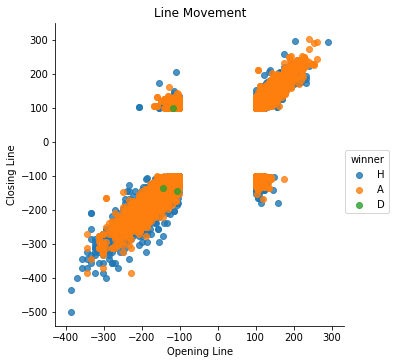

In [26]:
# home teams relatively favored over visitors
game_h_win = game_odds[game_odds['winner']=='H']
game_a_win = game_odds[game_odds['winner']=='A']
#sns.set()

sns.lmplot( x="p_ml_home_start", y="p_ml_home_final", data=game_odds, fit_reg=False, legend=True, hue='winner')
plt.title('Line Movement')
plt.xlabel('Opening Line')
plt.ylabel('Closing Line')
plt.show()

# technical question: how can I color the scatter plot based on third variable (outcome)? time to move to seaborn?

# questions: when visitors are the 'better team,' are they undervalued?
#            is homefield advantage a bigger factor during the day or at night?
#            do bad teams lose home field advantage when their attendance goes down (proxy for interest in team)?
#                     are record and attendance correlated? is this a good proxy?
#            what parks are good for lefty/righty power hitters?

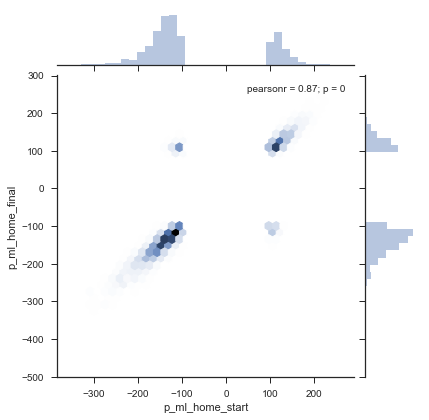

In [27]:
sns.set(style="ticks")

sns.jointplot(game_odds['p_ml_home_start'], game_odds['p_ml_home_final'], kind="hex")
plt.show()

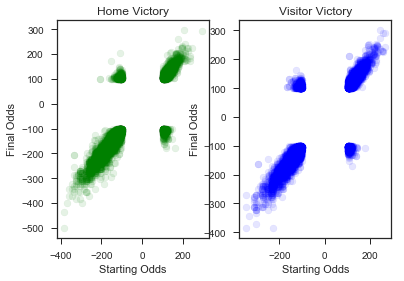

In [28]:
plt.subplot(1, 2, 1)
plt.scatter(game_h_win['p_ml_home_start'], game_h_win['p_ml_home_final'], c='green', alpha = .1)
plt.xlabel('Starting Odds')
plt.ylabel('Final Odds')
plt.title('Home Victory')

plt.subplot(1, 2, 2)
plt.scatter(game_a_win['p_ml_home_start'], game_a_win['p_ml_home_final'], c='blue', alpha = .1)
plt.xlabel('Starting Odds')
plt.ylabel('Final Odds')
plt.title('Visitor Victory')

plt.show()

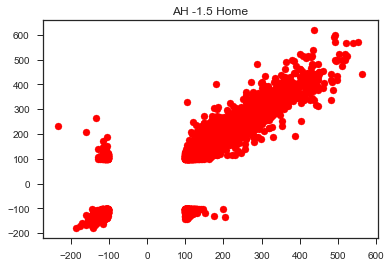

In [29]:
plt.scatter(odds['p_ah_minus_1-5_home_start'], odds['p_ah_minus_1-5_home_final'], c='red')
plt.title('AH -1.5 Home')
plt.show()

# questions: how often do favored teams win by only one run?
#            is it worth the risk to chase better odds? convetional wisdom says no, but let's take a look
#                       most optimal solution is to bet ML when a team is more likely to win by one run and AH when more

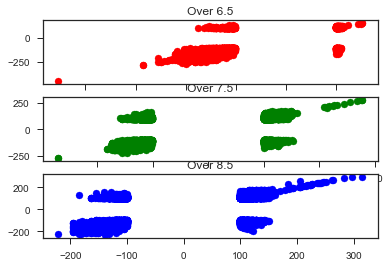

In [30]:
plt.subplot(3, 1, 1)
plt.scatter(odds['p_over_6-5_start'], odds['p_over_6-5_final'], c='red')
plt.title('Over 6.5')

plt.subplot(3, 1, 2)
plt.scatter(odds['p_over_7-5_start'], odds['p_over_7-5_final'], c='green')
plt.title('Over 7.5')

plt.subplot(3, 1, 3)
plt.scatter(odds['p_over_8-5_start'], odds['p_over_8-5_final'], c='blue')
plt.title('Over 8.5')
plt.show()

# questions: how often do games have more than 8 runs?
#            is worth the risk to chase better odds?
#            what are the best indicators of high-scoring games? temperature? home plate ump? errors? rolling calculations?
#   overall: better to bet based on value or predicted outcome?


In [31]:
game_odds['total_runs'] = game_odds['home_final'] + game_odds['vis_final']

In [32]:
game_odds

,game_id,odds_matchup,date_x,weekday,season,month,start_time,duration,total_innings,day_night,game_site,attendance,home_final,vis_final,dh_used,home_team_x,visiting_team,home_plate_ump,base1_ump,base2_ump,base3_ump,temperature,wind_dir,wind_speed,field_cond,precipitation,sky,home_starting_pitcher,vis_starting_pitcher,winning_pitcher,losing_pitcher,save,home_hits,vis_hits,home_errors,vis_errors,home_lob,vis_lob,winner,home_minus_1,home_plus_1,away_minus_1,away_plus_1,ou_6,ou_7,ou_8,ou_9,p_ml_home_start,p_ml_away_start,p_ml_home_final,p_ml_away_final,wager,winning_team,ml_h_win,ml_a_win,h_ml_result,a_ml_result,optimal,favorite,test,fav_strategy_outcome,dog_strategy_outcome,total_runs
0,ANA200904070,2009-04-07-LAA-OAK,2009-04-07,Tuesday,2009,Apr,707,197,9,N,ANA01,43396,4,6,T,ANA,OAK,vanol901,holbs901,iassd901,relic901,62,2,10,0,0,0,mosed001,cahit001,wuerm001,jepsk001,ziegb001,8,16,0,1,10,12,H,W,W,L,L,U,U,U,U,-147.0,139.0,-137.0,134.0,10,ANA,7.30,13.40,7.30,-10.00,7.30,H,7.30,7.30,-10.00,10
1,ANA200904080,2009-04-08-LAA-OAK,2009-04-08,Wednesday,2009,Apr,707,193,9,N,ANA01,43283,4,6,T,ANA,OAK,holbs901,iassd901,relic901,vanol901,60,2,12,0,0,2,adenn001,eveld001,baila001,fuenb001,ziegb001,9,15,0,2,8,13,A,L,L,W,W,O,O,O,O,-103.0,100.0,-109.0,-103.0,10,OAK,9.17,9.71,-10.00,9.71,9.71,H,-10.00,-10.00,9.71,10
2,ANA200904110,2009-04-11-LAA-BOS,2009-04-11,Saturday,2009,Apr,111,174,9,D,ANA01,40163,4,5,T,ANA,BOS,rapue901,schrp901,hudsm901,westj901,63,2,8,0,0,0,saunj001,pennb002,pennb002,saunj001,papej001,8,8,0,0,7,3,A,L,W,L,W,O,O,O,U,-115.0,106.0,-109.0,102.0,10,BOS,9.17,10.20,-10.00,10.20,10.20,H,-10.00,-10.00,10.20,9
3,ANA200904110,2009-04-11-LAA-BOS,2009-04-11,Saturday,2009,Apr,111,174,9,D,ANA01,40163,4,5,T,ANA,BOS,rapue901,schrp901,hudsm901,westj901,63,2,8,0,0,0,saunj001,pennb002,pennb002,saunj001,papej001,8,8,0,0,7,3,H,W,W,L,L,O,O,O,U,-101.0,-108.0,-105.0,-103.0,10,ANA,9.52,9.71,9.52,-10.00,9.52,H,9.52,9.52,-10.00,9
4,ANA200904120,2009-04-12-LAA-BOS,2009-04-12,Sunday,2009,Apr,1239,196,9,D,ANA01,38076,5,4,T,ANA,BOS,schrp901,hudsm901,westj901,rapue901,66,3,3,0,0,1,mosed001,beckj002,mosed001,beckj002,fuenb001,10,9,2,0,5,10,H,L,W,L,W,O,O,O,U,158.0,-161.0,163.0,-172.0,10,ANA,16.30,5.81,16.30,-10.00,16.30,A,-10.00,-10.00,16.30,9
5,ANA200904220,2009-04-22-LAA-DET,2009-04-22,Wednesday,2009,Apr,707,206,9,N,ANA01,43047,10,12,T,ANA,DET,wegnm901,drakr901,kellj901,timmt901,61,2,7,0,0,2,saunj001,verlj001,rincj001,shies002,NaN,16,18,1,0,8,8,H,L,W,L,W,O,U,U,U,100.0,100.0,-108.0,-104.0,10,ANA,9.26,9.62,9.26,-10.00,9.26,H,9.26,9.26,-10.00,22
6,ANA200904230,2009-04-23-LAA-DET,2009-04-23,Thursday,2009,Apr,707,180,9,N,ANA01,38543,10,5,T,ANA,DET,drakr901,kellj901,timmt901,wegnm901,64,0,8,0,0,2,palmm001,jacke001,palmm001,jacke001,NaN,15,7,1,3,9,5,A,L,L,W,W,O,O,O,O,-108.0,-101.0,-103.0,-105.0,10,DET,9.71,9.52,-10.00,9.52,9.52,A,9.52,9.52,-10.00,15
7,ANA200904250,2009-04-25-LAA-SEA,2009-04-25,Saturday,2009,Apr,608,184,9,N,ANA01,43542,8,9,T,ANA,SEA,mcclt901,barrt901,gibsg901,fleta901,66,2,4,0,0,1,ortea001,silvc001,silvc001,ortea001,aardd001,11,12,1,0,7,5,A,L,L,W,W,O,O,O,O,112.0,-110.0,108.0,-116.0,10,SEA,10.80,8.62,-10.00,8.62,8.62,A,8.62,8.62,-10.00,17
8,ANA200904260,2009-04-26-LAA-SEA,2009-04-26,Sunday,2009,Apr,1237,163,9,D,ANA01,43057,8,0,T,ANA,SEA,barrt901,gibsg901,fleta901,mcclt901,66,2,8,0,0,1,weavj003,washj001,weavj003,washj001,NaN,14,5,0,1,10,7,H,W,W,L,L,O,O,U,U,-139.0,133.0,-147.0,137.0,10,ANA,6.80,13.70,6.80,-10.00,6.80,H,6.80,6.80,-10.00,8
9,ANA200904260,2009-04-26-LAA-SEA,2009-04-26,Sunday,2009,Apr,1237,163,9,D,ANA01,43057,8,0,T,ANA,SEA,barrt901,gibsg901,fleta901,mcclt901,66,2,8,0,0,1,weavj003,washj001,weavj003,washj001,NaN,14,5,0,1,10,7,A,L,W,L,W,O,O,O,O,-120.0,120.0,-128.0,115.0,10,SEA,7.81,11.50,-10.00,11.50,11.50,H,-10.00,-10.00,11.50,8


In [33]:
locations = game_odds['game_site'].unique()
locations

array(['ANA01', 'PHO01', 'ATL02', 'BAL12', 'BOS07', 'CHI12', 'CHI11',
       'CIN09', 'CLE08', 'DEN02', 'DET05', 'MIA01', 'HOU03', 'KAN06',
       'LOS03', 'MIL06', 'MIN03', 'NYC21', 'NYC20', 'OAK01', 'PHI13',
       'PIT08', 'SAN02', 'SEA03', 'SFO03', 'STL10', 'STP01', 'ARL02',
       'TOR02', 'WAS11', 'SJU01', 'MIN04', 'MIA02', 'TOK01', 'SYD01',
       'ATL03'], dtype=object)

In [34]:
wind_dict = {0: 'unknown', 1:'to LF', 2:'to CF', 3:'to RF', 4:'LF to RF', 5:'from LF', 6:'from CF', 7:'from RF', 8:'RF to LF'}
game_odds['wind_desc'] = game_odds['wind_dir'].map(wind_dict)

In [35]:
game_runs1 = game_odds[['game_site', 'temperature', 'wind_speed', 'wind_desc', 'total_runs', 'winner']]

game_runs1 = game_runs1[game_runs1['game_site'].isin(['ANA01', 'KAN06','DEN02', 'MIA02'])]
game_runs1

,game_site,temperature,wind_speed,wind_desc,total_runs,winner
0,ANA01,62,10,to CF,10,H
1,ANA01,60,12,to CF,10,A
2,ANA01,63,8,to CF,9,A
3,ANA01,63,8,to CF,9,H
4,ANA01,66,3,to RF,9,H
5,ANA01,61,7,to CF,22,H
6,ANA01,64,8,unknown,15,A
7,ANA01,66,4,to CF,17,A
8,ANA01,66,8,to CF,8,H
9,ANA01,66,8,to CF,8,A


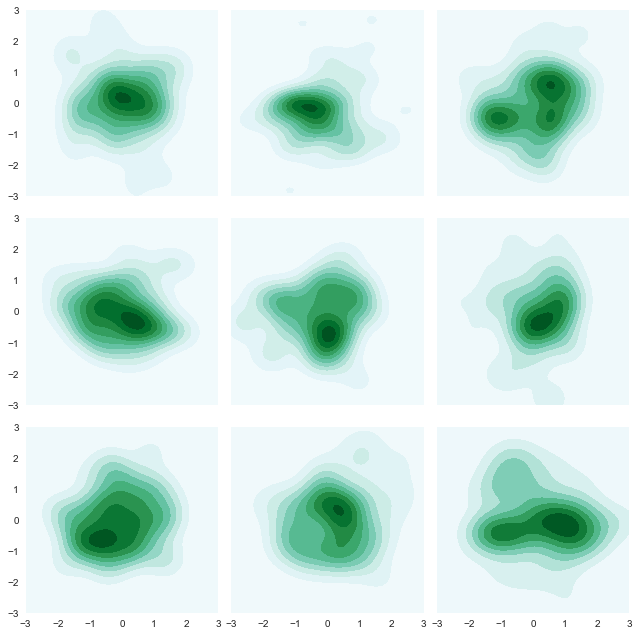

In [36]:
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax in axes.flat:

    # Create a cubehelix colormap to use with kdeplot
    #cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()
plt.show()

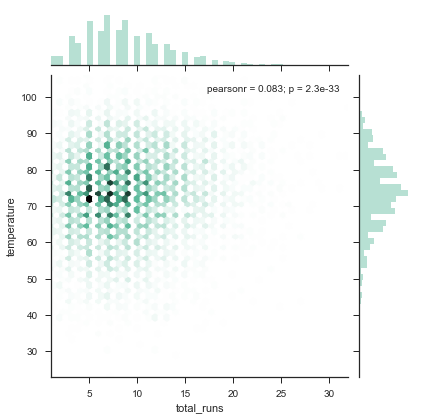

In [37]:
# from scipy.stats import kendalltau
sns.set(style="ticks")

sns.jointplot(game_odds['total_runs'], game_odds['temperature'], kind="hex",  color="#4CB391")
plt.show()

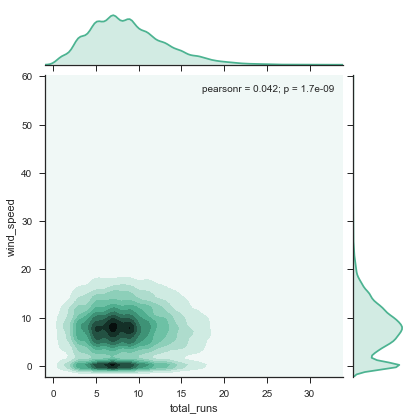

In [38]:
sns.jointplot(game_odds['total_runs'], game_odds['wind_speed'], kind="kde",  color="#4CB391")
plt.show()

In [39]:
heat1 = game_odds[['wind_desc', 'wind_speed', 'total_runs']][game_odds['wind_speed'] > 0]
heat1 = heat1.groupby(['wind_desc', 'wind_speed']).count().unstack(level=1)
heat1

total_runs                                                          \
wind_speed         1      2      3      4      5      6      7      8      9    
wind_desc                                                                       
LF to RF         38.0  103.0  148.0  186.0  247.0  270.0  327.0  349.0  344.0   
RF to LF         27.0   78.0  117.0  160.0  230.0  264.0  273.0  289.0  264.0   
from CF          16.0   43.0   56.0   80.0  109.0  120.0  119.0  132.0   97.0   
from LF          36.0   51.0   61.0   68.0  120.0   89.0  117.0  120.0  109.0   
from RF          19.0   53.0   77.0   99.0  132.0  114.0  150.0  157.0  141.0   
to CF            34.0   96.0  112.0  166.0  216.0  252.0  273.0  317.0  232.0   
to LF            31.0   45.0   98.0  119.0  122.0  135.0  125.0  143.0  149.0   
to RF            36.0   90.0  118.0  124.0  194.0  207.0  226.0  227.0  226.0   
unknown         118.0   26.0   38.0   51.0   68.0   55.0   50.0   37.0   37.0   

                                                                              \
wind_speed     10     11     12     13     14     15    16    17    18    19   
wind_desc                                                                      
LF to RF    337.0  213.0  214.0  141.0  107.0  125.0  62.0  66.0  35.0  23.0   
RF to LF    244.0  215.0  197.0  157.0  107.0  112.0  78.0  63.0  40.0  29.0   
from CF      72.0   98.0   71.0   47.0   27.0   46.0  23.0  14.0  23.0   4.0   
from LF     103.0   76.0   58.0   60.0   41.0   28.0  24.0  11.0  11.0   9.0   
from RF     128.0  103.0  110.0   68.0   59.0   68.0  27.0  28.0  14.0  10.0   
to CF       162.0  134.0  143.0   99.0  112.0   66.0  45.0  50.0  34.0  11.0   
to LF       154.0   93.0  105.0   86.0   61.0   64.0  40.0  32.0  21.0  13.0   
to RF       210.0  174.0  154.0  137.0   81.0   97.0  70.0  50.0  25.0  18.0   
unknown      35.0   24.0   14.0   17.0   12.0    7.0   9.0   2.0   1.0   NaN   

                                                                           \
wind_speed    20    21    22   23   24   25   26   27   28   29   30   31   
wind_desc                                                                   
LF to RF    15.0   7.0   9.0  5.0  7.0  6.0  4.0  4.0  1.0  2.0  2.0  NaN   
RF to LF    21.0  23.0   8.0  5.0  6.0  NaN  NaN  4.0  1.0  2.0  1.0  NaN   
from CF      1.0   9.0   7.0  5.0  5.0  NaN  2.0  NaN  2.0  1.0  NaN  NaN   
from LF     10.0   8.0   1.0  5.0  2.0  1.0  NaN  NaN  NaN  NaN  NaN  1.0   
from RF     12.0   2.0   7.0  2.0  6.0  3.0  NaN  2.0  NaN  NaN  2.0  NaN   
to CF       18.0  15.0   7.0  5.0  4.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN   
to LF        8.0   3.0   5.0  5.0  3.0  NaN  1.0  NaN  NaN  NaN  NaN  1.0   
to RF       19.0  15.0  10.0  2.0  2.0  1.0  NaN  1.0  NaN  NaN  NaN  NaN   
unknown      2.0   3.0   2.0  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN   

                      
wind_speed   32   58  
wind_desc             
LF to RF    1.0  NaN  
RF to LF    NaN  1.0  
from CF     NaN  NaN  
from LF     NaN  NaN  
from RF     NaN  NaN  
to CF       NaN  NaN  
to LF       NaN  NaN  
to RF       NaN  NaN  
unknown     NaN  NaN

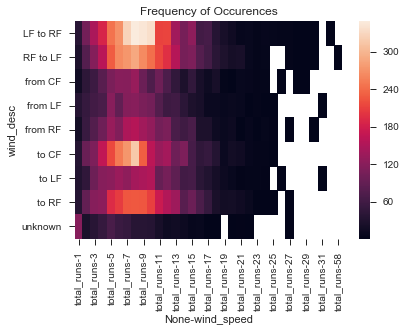

In [40]:
sns.heatmap(heat1)
plt.title('Frequency of Occurences')
plt.show()

In [41]:
heat2 = game_odds[['wind_desc', 'wind_speed', 'total_runs']]
heat2 = heat2.groupby(['wind_desc', 'wind_speed']).mean().unstack(level=1)
heat2

total_runs                                                     \
wind_speed         0         1         2          3         4         5    
wind_desc                                                                  
LF to RF     8.750000  8.868421  8.815534   8.729730  9.134409  8.125506   
RF to LF     7.927536  7.370370  8.333333   8.871795  8.787500  9.330435   
from CF      7.880000  8.500000  7.627907   9.000000  9.162500  8.908257   
from LF      8.636364  8.833333  8.450980   9.032787  9.911765  8.133333   
from RF      7.190476  9.894737  7.301887  10.025974  8.777778  8.863636   
to CF        7.903846  8.294118  8.072917   8.812500  8.500000  9.226852   
to LF        7.344828  8.612903  8.111111   8.336735  9.134454  9.090164   
to RF        8.200000  8.777778  8.300000   8.415254  9.362903  8.268041   
unknown      8.468003  7.864407  9.538462   7.710526  9.000000  8.382353   

                                                                         \
wind_speed        6         7          8         9         10        11   
wind_desc                                                                 
LF to RF    8.514815  8.324159   8.326648  8.055233  8.394659  8.014085   
RF to LF    8.469697  8.952381   8.906574  8.731061  8.668033  9.255814   
from CF     8.841667  8.672269   8.151515  8.402062  8.958333  8.775510   
from LF     9.022472  9.042735   8.241667  9.064220  9.203883  9.118421   
from RF     8.807018  9.280000   8.426752  9.014184  8.398438  8.407767   
to CF       8.480159  9.021978   8.189274  8.573276  8.154321  8.634328   
to LF       8.637037  9.168000   8.916084  8.932886  8.961039  9.032258   
to RF       8.531401  8.800885   8.577093  8.119469  9.109524  9.155172   
unknown     8.436364  7.640000  10.486486  7.513514  9.885714  7.041667   

                                                                           \
wind_speed        12        13        14         15         16         17   
wind_desc                                                                   
LF to RF    8.247664  8.375887  7.934579   8.192000   9.387097   9.181818   
RF to LF    9.720812  9.000000  8.514019  10.125000   9.692308  10.841270   
from CF     8.535211  9.446809  8.851852   9.239130   9.652174   7.214286   
from LF     9.000000  9.900000  8.878049  10.107143   9.291667   7.818182   
from RF     8.400000  8.838235  8.491525   9.661765   9.444444  10.500000   
to CF       8.496503  9.252525  8.991071   9.303030   9.066667   9.400000   
to LF       8.676190  9.127907  8.868852   8.250000  10.000000   9.125000   
to RF       8.467532  8.686131  8.407407   8.072165   8.657143   8.980000   
unknown     8.857143  8.117647  9.000000   9.428571  12.111111   6.500000   

                                                                         \
wind_speed         18         19         20         21         22    23   
wind_desc                                                                 
LF to RF     8.142857   8.956522   8.600000   8.428571   7.888889  10.6   
RF to LF    10.225000   8.379310   9.380952   8.652174   7.375000  12.6   
from CF      9.260870   6.500000   6.000000   9.111111   8.000000  10.6   
from LF     10.363636  10.777778   8.600000   8.250000  19.000000   9.0   
from RF     10.785714   9.200000  10.833333   4.000000  10.000000   6.0   
to CF        9.000000   7.909091   7.611111   9.733333  10.142857   9.8   
to LF        8.904762  12.000000  12.625000   5.666667   9.400000   7.2   
to RF       10.320000   9.500000   8.368421  10.200000   9.800000  10.5   
unknown      9.000000        NaN  18.000000  12.666667   8.000000   NaN   

                                                                               
wind_speed         24         25    26    27    28    29    30   31   32   58  
wind_desc                                                                      
LF to RF    13.000000  11.166667   7.5   7.5   4.0  14.0  10.5  NaN  9.0  NaN  
RF to LF     9.000000        NaN   NaN   9.0  16.0 

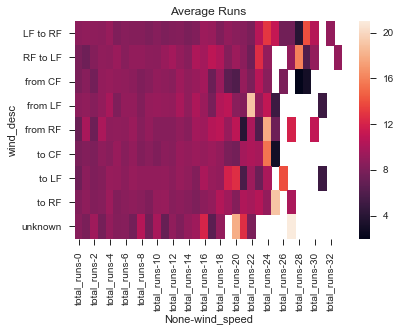

In [42]:
sns.heatmap(heat2)
plt.title('Average Runs')
plt.show()

In [43]:
game_odds['lob'] = game_odds['home_lob'] + game_odds['vis_lob']
game_odds['total_errors'] = game_odds['home_errors'] + game_odds['vis_errors']

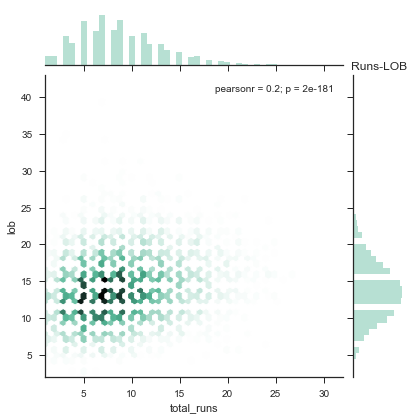

In [44]:
sns.jointplot(game_odds['total_runs'], game_odds['lob'], kind="hex",  color="#4CB391")
plt.title('Runs-LOB')
plt.show()

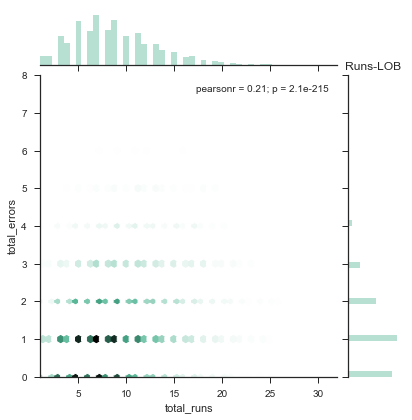

In [45]:
sns.jointplot(game_odds['total_runs'], game_odds['total_errors'], kind="hex",  color="#4CB391")
plt.title('Runs-LOB')
plt.show()

In [46]:
import rpy2
%load_ext rpy2.ipython
%R require("ggplot2")

array([1], dtype=int32)

In [47]:
%%R 
test <- 123
print(test)

In [48]:
test

NameError: name 'test' is not defined